In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [21]:
# Change the path to match your folder in Drive
data_dir = "/content/drive/MyDrive/agri_data/data"

# Test it
import os
print("✅ Found files:", len(os.listdir(data_dir)))

✅ Found files: 2600


✅ Total JPEG images found: 1300


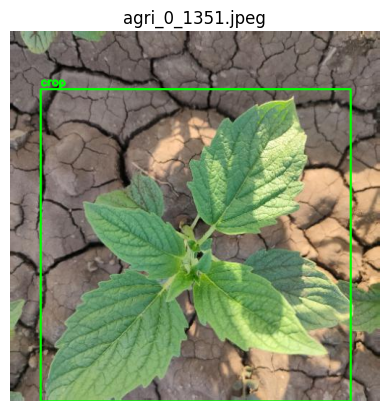

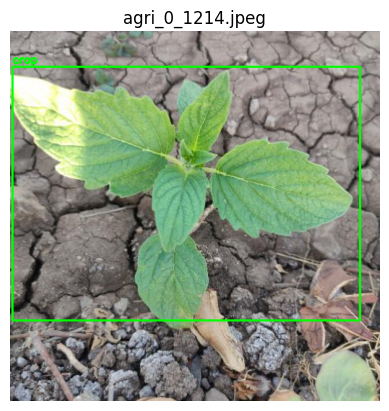

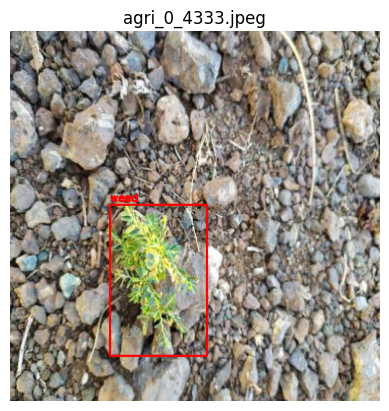

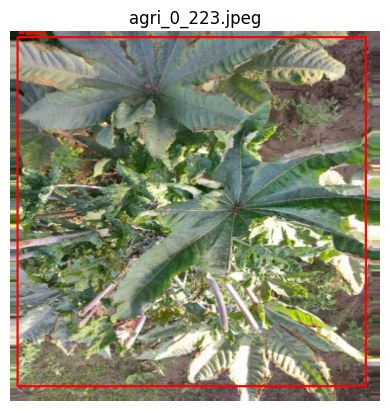

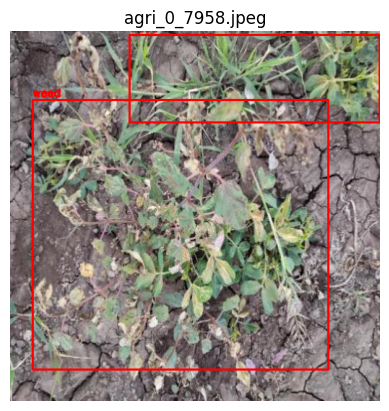

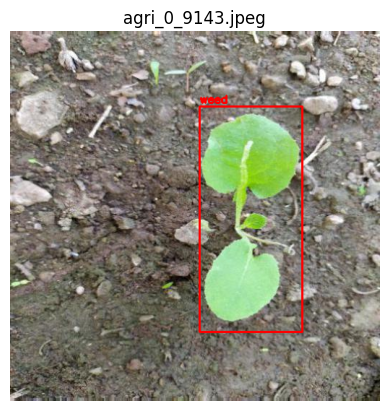

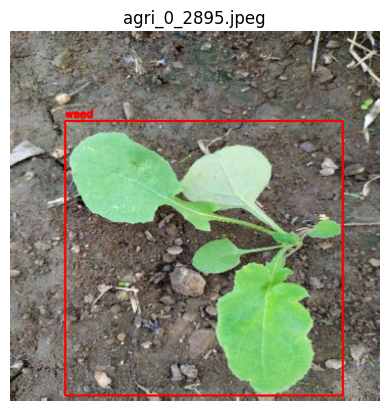

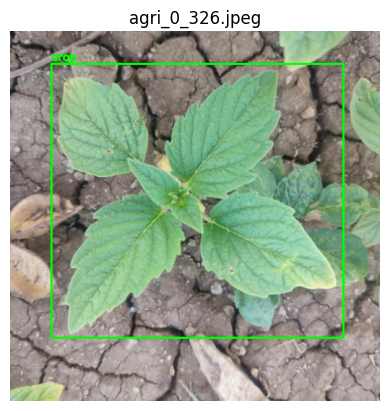

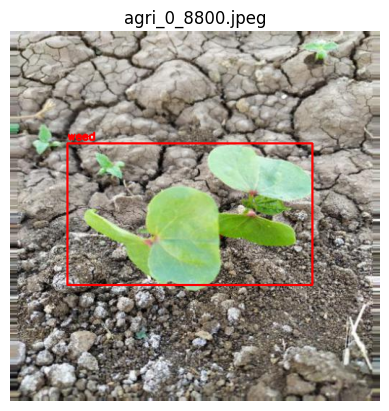

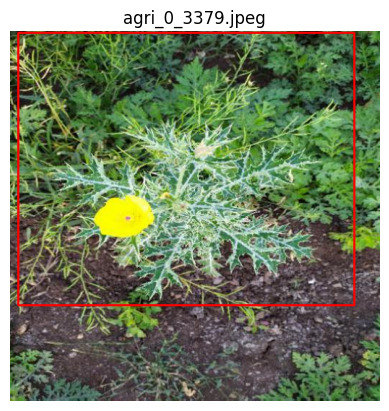

In [22]:
import os
import random
import cv2
import matplotlib.pyplot as plt

# Path to your dataset
data_dir = "/content/drive/MyDrive/agri_data/data"

# Class names (as per your project)
class_names = ['crop', 'weed']

# Function to draw bounding boxes from YOLO labels
def draw_yolo_annotations(image_path, label_path):
    image = cv2.imread(image_path)
    if image is None:
        print(f"⚠️ Couldn't read image: {image_path}")
        return None
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    h, w = image.shape[:2]

    if os.path.exists(label_path):
        with open(label_path, 'r') as f:
            for line in f:
                try:
                    cls_id, x, y, bw, bh = map(float, line.strip().split())
                    x1 = int((x - bw / 2) * w)
                    y1 = int((y - bh / 2) * h)
                    x2 = int((x + bw / 2) * w)
                    y2 = int((y + bh / 2) * h)
                    color = (0, 255, 0) if int(cls_id) == 0 else (255, 0, 0)
                    label = class_names[int(cls_id)]
                    cv2.rectangle(image, (x1, y1), (x2, y2), color, 2)
                    cv2.putText(image, label, (x1, y1 - 5), cv2.FONT_HERSHEY_SIMPLEX, 0.5, color, 2)
                except Exception as e:
                    print("Label error:", e)
    return image

# Collect all .jpeg images
image_files = [f for f in os.listdir(data_dir) if f.lower().endswith('.jpeg')]

print(f"✅ Total JPEG images found: {len(image_files)}")

# Sample and visualize 10 images
sample_files = random.sample(image_files, min(10, len(image_files)))

for file in sample_files:
    img_path = os.path.join(data_dir, file)
    label_path = os.path.splitext(img_path)[0] + '.txt'
    result_img = draw_yolo_annotations(img_path, label_path)

    if result_img is not None:
        plt.imshow(result_img)
        plt.axis('off')
        plt.title(file)
        plt.show()

In [23]:
import shutil

# Input folder
source_dir = "/content/drive/MyDrive/agri_data/data"

# Output base directory for YOLO
yolo_base = "/content/drive/MyDrive/agri_data/yolo_dataset"
image_train_dir = os.path.join(yolo_base, "images/train")
image_val_dir   = os.path.join(yolo_base, "images/val")
label_train_dir = os.path.join(yolo_base, "labels/train")
label_val_dir   = os.path.join(yolo_base, "labels/val")

# Create directories
for d in [image_train_dir, image_val_dir, label_train_dir, label_val_dir]:
    os.makedirs(d, exist_ok=True)

# Collect image files
image_files = [f for f in os.listdir(source_dir) if f.lower().endswith(".jpeg")]
random.shuffle(image_files)

# Split 80% train, 20% val
split_index = int(0.8 * len(image_files))
train_files = image_files[:split_index]
val_files   = image_files[split_index:]

# Function to copy files
def copy_data(files, image_dst, label_dst):
    for file in files:
        img_src = os.path.join(source_dir, file)
        label_src = os.path.splitext(img_src)[0] + ".txt"

        shutil.copy(img_src, os.path.join(image_dst, file))

        if os.path.exists(label_src):
            shutil.copy(label_src, os.path.join(label_dst, os.path.basename(label_src)))

# Copy to new folders
copy_data(train_files, image_train_dir, label_train_dir)
copy_data(val_files, image_val_dir, label_val_dir)

print("✅ Dataset split complete!")
print(f"Train images: {len(train_files)}, Val images: {len(val_files)}")

✅ Dataset split complete!
Train images: 1040, Val images: 260


In [24]:
yaml_path = os.path.join(yolo_base, "data.yaml")

with open(yaml_path, 'w') as f:
    f.write(f"""path: {yolo_base}
train: images/train
val: images/val
names:
  0: crop
  1: weed
""")

print(f"✅ YOLO config file created at: {yaml_path}")

✅ YOLO config file created at: /content/drive/MyDrive/agri_data/yolo_dataset/data.yaml


In [25]:
# Clone YOLOv5 repository
!git clone https://github.com/ultralytics/yolov5
%cd yolov5

# Install dependencies
!pip install -r requirements.txt

Cloning into 'yolov5'...
remote: Enumerating objects: 17516, done.
remote: Counting objects: 100% (20/20), done.
remote: Compressing objects: 100% (20/20), done.
remote: Total 17516 (delta 7), reused 0 (delta 0), pack-reused 17496 (from 4)
Receiving objects: 100% (17516/17516), 16.62 MiB | 19.12 MiB/s, done.
Resolving deltas: 100% (12002/12002), done.
/content/yolov5
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 121.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 89.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 60.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 20.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.3 MB/s eta

In [41]:
!python train.py \
  --img 512 \
  --batch 16 \
  --epochs 10 \
  --data /content/drive/MyDrive/agri_data/yolo_dataset/data.yaml \
  --weights yolov5n.pt \
  --name crop_weed_fast

wandb: WARNING ⚠️ wandb is deprecated and will be removed in a future release. See supported integrations at https://github.com/ultralytics/yolov5#integrations.
2025-07-24 17:07:42.676683: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1753376862.709599   16548 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1753376862.719672   16548 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
wandb: (1) Create a W&B account
wandb: (2) Use an existing W&B account
wandb: (3) Don't visualize my results
wandb: Enter your choice: (30 second timeout) 
wandb: W&B disabled due to login timeout.
train: weights=yolov5n.pt, cfg=, data=/content/drive/MyDrive/agri_data/yolo_da

In [42]:
!cp -r /content/yolov5/runs/detect/test_output /content/drive/MyDrive/agri_data/
print("✅ Output saved to Drive: agri_data/test_output")

✅ Output saved to Drive: agri_data/test_output


In [43]:
output_dir = "/content/yolov5/runs/detect/test_output"
print("📁 Contents of output folder:", os.listdir(output_dir))

📁 Contents of output folder: ['labels']


In [45]:
!python detect.py \
  --weights /content/yolov5/runs/train/crop_weed_fast/weights/best.pt \
  --img 512 \
  --conf 0.1 \
  --source /content/drive/MyDrive/agri_data/data \
  --name crop_weed_detect

detect: weights=['/content/yolov5/runs/train/crop_weed_fast/weights/best.pt'], source=/content/drive/MyDrive/agri_data/data, data=data/coco128.yaml, imgsz=[512, 512], conf_thres=0.1, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_format=0, save_csv=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=crop_weed_detect, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-422-g2540fd4c Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)

Fusing layers... 
Model summary: 157 layers, 1761871 parameters, 0 gradients, 4.1 GFLOPs
image 1/1300 /content/drive/MyDrive/agri_data/data/agri_0_1009.jpeg: 512x512 1 weed, 10.4ms
image 2/1300 /content/drive/MyDrive/agri_data/data/agri_0_1017.jpeg: 512x512 3 weeds, 6.8ms
image 3/1300 /content/drive/MyDrive/agri_data/data/agri_0_1018.jpeg: 512x5

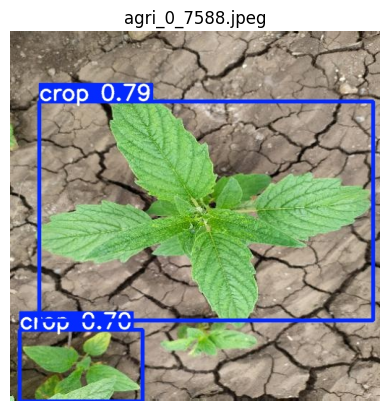

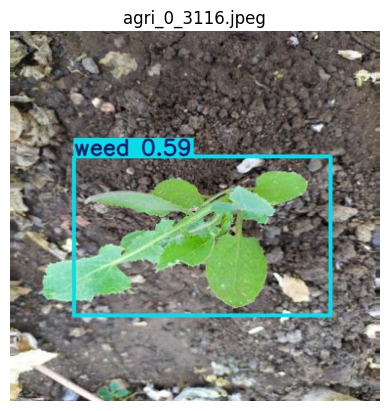

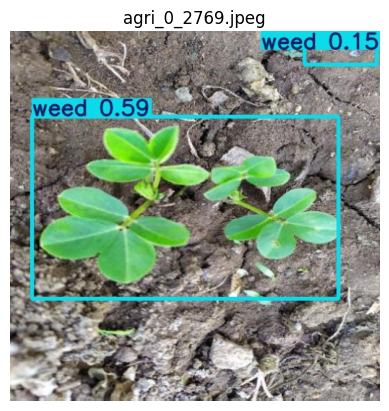

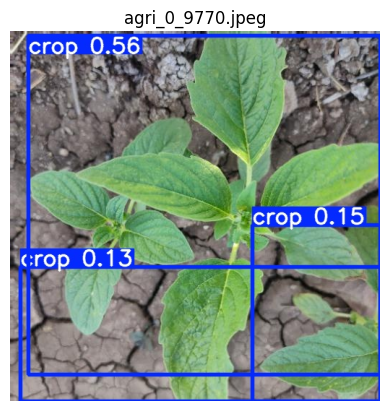

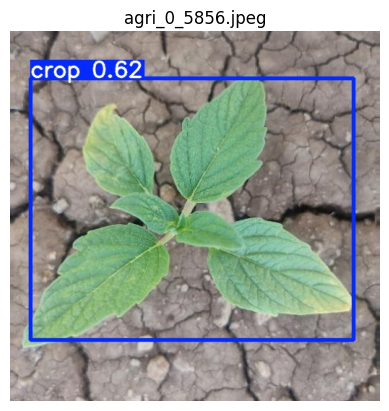

In [46]:
result_dir = "/content/yolov5/runs/detect/crop_weed_detect"
images = [f for f in os.listdir(result_dir) if f.lower().endswith(('.jpg', '.jpeg', '.png'))]

if not images:
    print("❌ No detection images found.")
else:
    for img_name in images[:5]:  # Show first 5 results
        img_path = os.path.join(result_dir, img_name)
        img = cv2.imread(img_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        plt.imshow(img)
        plt.title(img_name)
        plt.axis('off')
        plt.show()